# AIN429: Data Mining Lab - Fall 2024
## **Assignment 2**  

**Student Name**: Süleyman Yolcu

**Student ID**: 2210765016

---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# Part 1: Dataset Import and Summary

- # Step 1: Load the Datasets

In [5]:
main_df = pd.read_csv('Data_Main.csv')
additional_df = pd.read_csv('Data_Additional.csv')

###  **Brief Introduction to the Datasets:**

- **Main Dataset:**
  - Contains 9,565 entries with 17 columns.
  - Columns primarily represent statistical metrics related to bean features, such as 'Area', 'Perimeter', 'MajorAxisLength', 'AspectRatio', and others.
  - The 'Class' column categorizes different types of observations of beans.

- **Additional Dataset:**
  - Contains 4,099 entries with 18 columns.
  - It shares several columns with the main dataset but includes additional features like 'Length', 'Width', and a 'Color' column that is entirely empty.
  - The 'Class' column also serves as a categorical identifier.


In [7]:
print("Main Dataset Information:")
print("\nMain Dataset Shape:", main_df.shape)
print(main_df.info())

Main Dataset Information:

Main Dataset Shape: (9565, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9565 entries, 0 to 9564
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             9509 non-null   float64
 1   Perimeter        9527 non-null   float64
 2   MajorAxisLength  9527 non-null   float64
 3   MinorAxisLength  9527 non-null   float64
 4   AspectRation     9527 non-null   float64
 5   Eccentricity     9527 non-null   float64
 6   ConvexArea       9527 non-null   float64
 7   EquivDiameter    9527 non-null   float64
 8   Extent           9527 non-null   float64
 9   Solidity         9478 non-null   float64
 10  roundness        9527 non-null   float64
 11  Compactness      9527 non-null   float64
 12  ShapeFactor1     9527 non-null   float64
 13  ShapeFactor2     9527 non-null   float64
 14  ShapeFactor3     9527 non-null   float64
 15  ShapeFactor4     9527 non-null   float64
 16  Cl

In [8]:
print("\nAdditional Dataset Information:")
print("\nAdditional Dataset Shape:", additional_df.shape)
print(additional_df.info())


Additional Dataset Information:

Additional Dataset Shape: (4099, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4099 entries, 0 to 4098
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           4077 non-null   float64
 1   Perimeter      4084 non-null   float64
 2   Length         4084 non-null   float64
 3   Width          4084 non-null   float64
 4   AspectRation   4084 non-null   float64
 5   Class          4084 non-null   object 
 6   ConvexArea     4084 non-null   float64
 7   EquivDiameter  4084 non-null   float64
 8   Extent         4084 non-null   float64
 9   Solidity       4084 non-null   float64
 10  roundness      4084 non-null   float64
 11  Compactness    4084 non-null   float64
 12  ShapeFactor1   4084 non-null   float64
 13  ShapeFactor2   4084 non-null   float64
 14  ShapeFactor3   4084 non-null   float64
 15  ShapeFactor4   4084 non-null   float64
 16  Eccentricity   4084 non-n

In [9]:
print("\nMain Dataset Missing Values:")
print(main_df.isnull().sum())


Main Dataset Missing Values:
Area               56
Perimeter          38
MajorAxisLength    38
MinorAxisLength    38
AspectRation       38
Eccentricity       38
ConvexArea         38
EquivDiameter      38
Extent             38
Solidity           87
roundness          38
Compactness        38
ShapeFactor1       38
ShapeFactor2       38
ShapeFactor3       38
ShapeFactor4       38
Class              38
dtype: int64


In [10]:
print("\nAdditional Dataset Missing Values:")
print(additional_df.isnull().sum())


Additional Dataset Missing Values:
Area               22
Perimeter          15
Length             15
Width              15
AspectRation       15
Class              15
ConvexArea         15
EquivDiameter      15
Extent             15
Solidity           15
roundness          15
Compactness        15
ShapeFactor1       15
ShapeFactor2       15
ShapeFactor3       15
ShapeFactor4       15
Eccentricity       15
Color            4099
dtype: int64


- # Step 2: Summary Statistics for All Features

In [12]:
print("\nSummary Statistics for Main Dataset:")
main_df.describe()


Summary Statistics for Main Dataset:


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,9509.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9478.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000
mean,53102.860027,855.950827,320.159026,202.629624,1.580527,0.749913,53819.091949,253.298790,0.749730,0.987150,0.873511,0.800528,0.006548,0.001718,0.644652,0.995069
std,29055.036879,212.772625,85.084259,44.605666,0.245614,0.092438,29490.728952,58.703709,0.048710,0.004666,0.059416,0.061703,0.001120,0.000596,0.099104,0.004399
min,20420.000000,524.932000,183.601165,122.512653,1.036423,0.262774,20684.000000,161.243764,0.555315,0.943559,0.489618,0.640577,0.002778,0.000567,0.410339,0.949990
25%,36481.000000,704.692500,253.320436,176.302846,1.430310,0.714976,36861.500000,215.520421,0.719049,0.985624,0.832750,0.762943,0.005874,0.001156,0.582082,0.993666
50%,44710.000000,795.724000,297.390659,192.881799,1.549411,0.763839,45258.000000,238.592833,0.759942,0.988297,0.883082,0.801663,0.006631,0.001689,0.642664,0.996423
75%,61720.000000,977.981000,376.111433,217.744917,1.704391,0.809790,62710.000000,280.292656,0.786297,0.990039,0.916986,0.834642,0.007251,0.002170,0.696627,0.997893
max,251432.000000,1921.685000,738.144502,460.198497,2.430306,0.911423,257425.000000,565.803115,0.858420,0.994677,0.990685,0.981611,0.010451,0.003573,0.963560,0.999733


In [13]:
print("\nSummary Statistics for Additional Dataset:")
additional_df.describe()


Summary Statistics for Additional Dataset:


,Area,Perimeter,Length,Width,AspectRation,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Eccentricity,Color
count,4077.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,0.0
mean,52930.002208,853.726648,320.101841,201.433463,1.589575,53649.481881,252.517023,0.749739,0.987139,0.872748,0.798314,0.006599,0.001712,0.641113,0.995050,0.753185,NaN
std,29998.073066,217.805939,87.110906,45.803529,0.249059,30430.867309,60.270739,0.049960,0.004629,0.059764,0.061716,0.001147,0.000596,0.098712,0.004290,0.090946,NaN
min,20548.000000,524.736000,183.965251,129.576207,1.024868,20825.000000,161.748342,0.566669,0.919246,0.577844,0.648762,0.002902,0.000564,0.420892,0.947687,0.218951,NaN
25%,35975.000000,701.503250,253.073656,174.754001,1.434815,36397.500000,214.065899,0.717193,0.985759,0.831335,0.761274,0.005957,0.001147,0.579538,0.993772,0.717116,NaN
50%,44468.000000,793.375500,296.301489,191.264037,1.555313,45053.000000,238.011777,0.759674,0.988241,0.883419,0.800318,0.006687,0.001703,0.640509,0.996330,0.765902,NaN
75%,60453.000000,972.722750,376.818048,215.169957,1.711638,61367.500000,277.467724,0.788210,0.989940,0.916535,0.833422,0.007321,0.002171,0.694593,0.997853,0.811584,NaN
max,254616.000000,1985.370000,738.860154,447.418329,2.364017,263261.000000,569.374358,0.866195,0.993945,0.984877,0.987303,0.009897,0.003665,0.974767,0.999660,0.906126,NaN


In [14]:
main_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,53663.0,914.023,378.600140,181.647777,2.084254,0.877384,54314.0,261.392145,0.638025,0.988014,0.807180,0.690417,0.007055,0.000989,0.476676,0.993514,HOROZ
1,81701.0,1069.534,405.402871,258.923147,1.565727,0.769472,83006.0,322.528982,0.750053,0.984278,0.897528,0.795576,0.004962,0.001226,0.632942,0.991014,CALI
2,40693.0,770.418,290.248493,179.230720,1.619413,0.786565,41174.0,227.622356,0.689887,0.988318,0.861543,0.784233,0.007133,0.001664,0.615021,0.995973,SIRA
3,30835.0,663.731,250.374047,157.372914,1.590960,0.777768,31272.0,198.142225,0.737485,0.986026,0.879568,0.791385,0.008120,0.001965,0.626290,0.996402,DERMASON
4,66997.0,978.189,381.136300,226.262814,1.684485,0.804721,68032.0,292.067167,0.788423,0.984787,0.879872,0.766306,0.005689,0.001210,0.587225,0.989172,CALI


In [15]:
additional_df.head()

,Area,Perimeter,Length,Width,AspectRation,Class,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Eccentricity,Color
0,28734.0,638.018,200.524796,182.734419,1.097356,SEKER,29172.0,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0.411785,NaN
1,30140.0,620.134,201.847882,190.279279,1.060798,SEKER,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0.333680,NaN
2,30279.0,634.927,212.560556,181.510182,1.171067,SEKER,30600.0,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,0.520401,NaN
3,30477.0,670.033,211.050155,184.039050,1.146768,SEKER,30970.0,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,0.489478,NaN
4,30519.0,629.727,212.996755,182.737204,1.165591,SEKER,30847.0,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,0.513760,NaN


- Dropped the 'Color' column because all of the data was null

In [17]:
additional_df.drop('Color',axis=1,inplace=True)

- # Step 3: Visualizations to Show the Distribution of Key Features

In [19]:
def visualize_features(dataset):
    features = ['Area', 'AspectRation', 'Eccentricity', 'Extent', 'Solidity', 'roundness']
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Distribution of Features', fontsize=16)
    for i, feature in enumerate(features):
        row, col = divmod(i, 3)
        sns.histplot(dataset[feature], bins=30, kde=True, ax=axes[row, col])
        axes[row, col].set_title(f'{feature}')
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Frequency')    
    plt.tight_layout(rect=[0, 0, 1, 0.95]) 
    plt.show()

In [20]:
def visualize_boxplots(dataset):
    features = ['Area', 'AspectRation', 'Eccentricity', 'Extent', 'Solidity', 'roundness']
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Boxplots of Features', fontsize=16)
    for i, feature in enumerate(features):
        row, col = divmod(i, 3)
        sns.boxplot(data=dataset, x=feature, ax=axes[row, col])
        axes[row, col].set_title(f'{feature}')
        axes[row, col].set_xlabel(feature)
    plt.tight_layout(rect=[0, 0, 1, 0.95]) 
    plt.show()

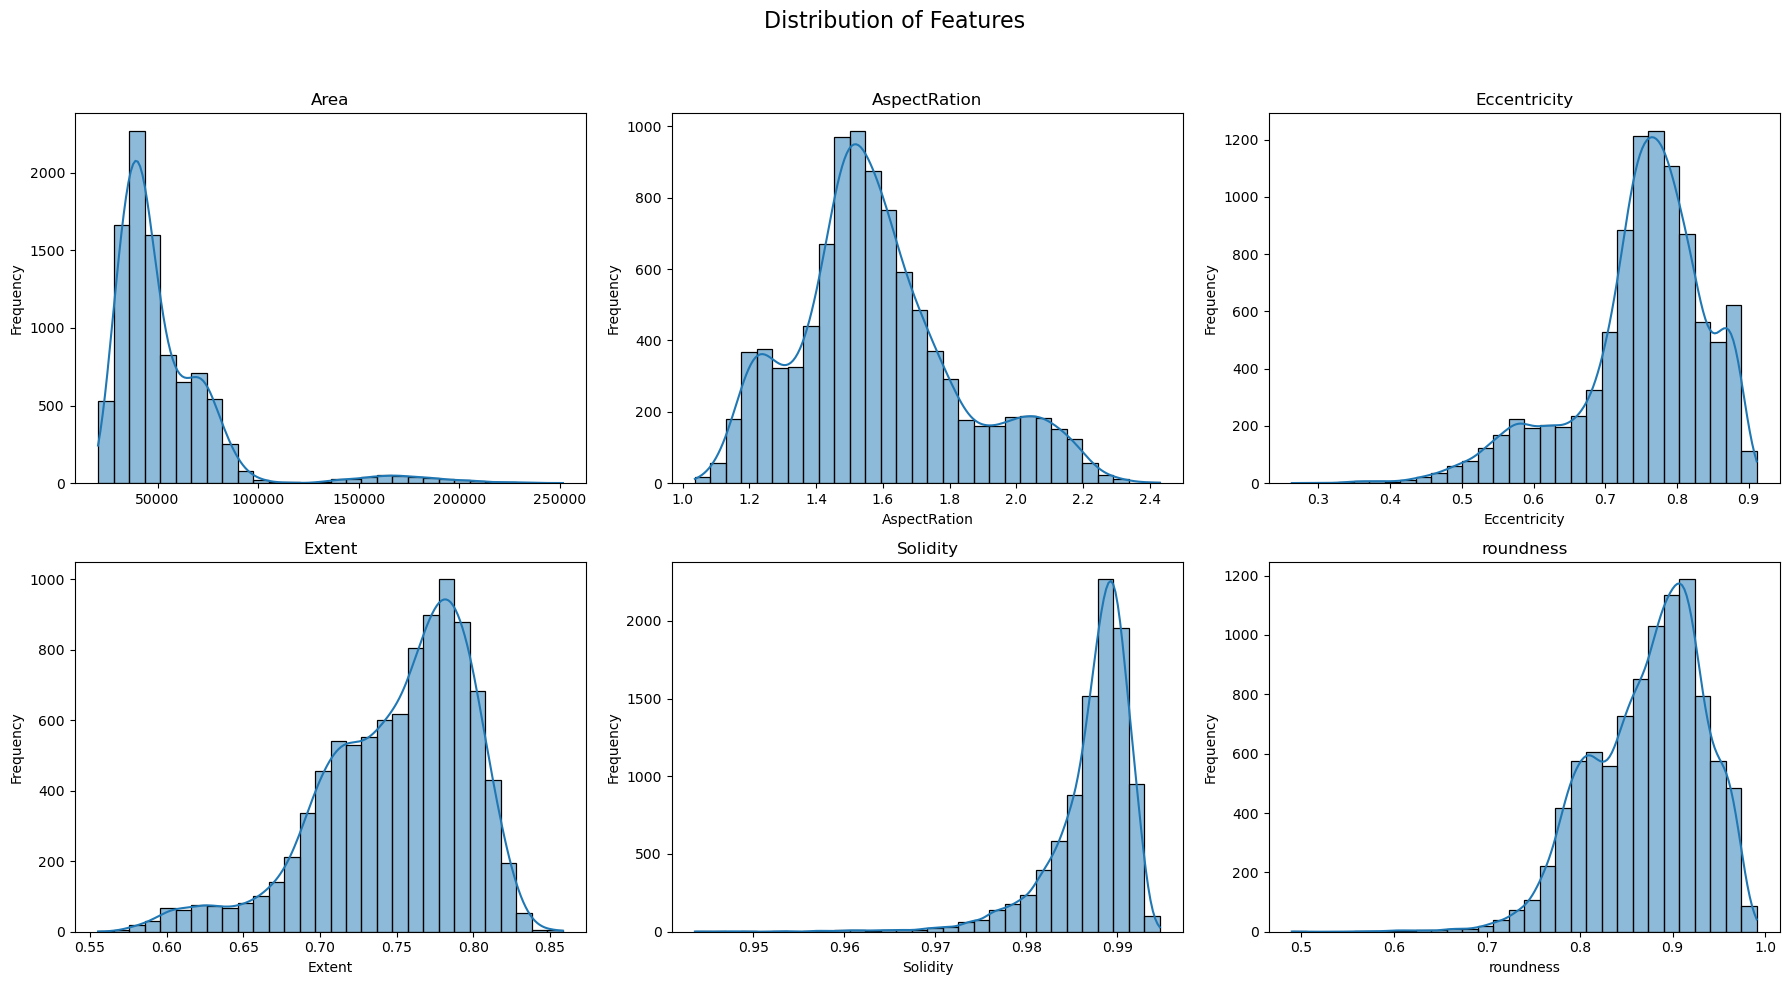

In [21]:
visualize_features(main_df)

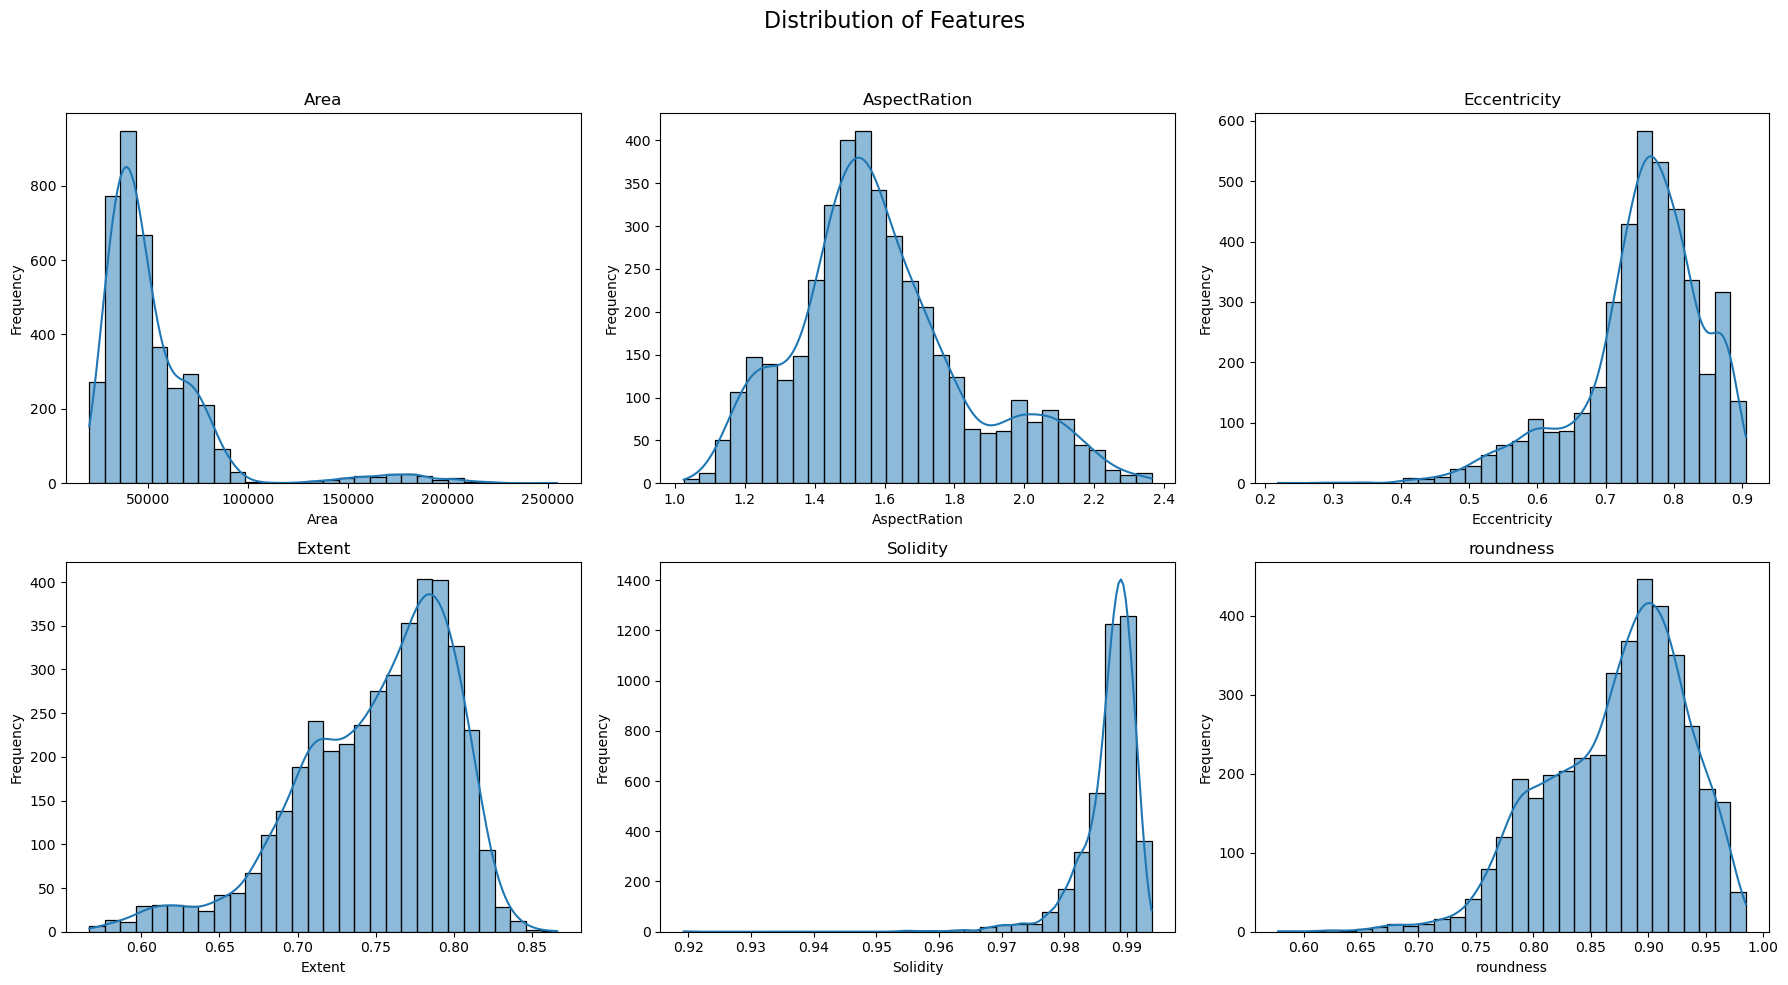

In [22]:
visualize_features(additional_df)

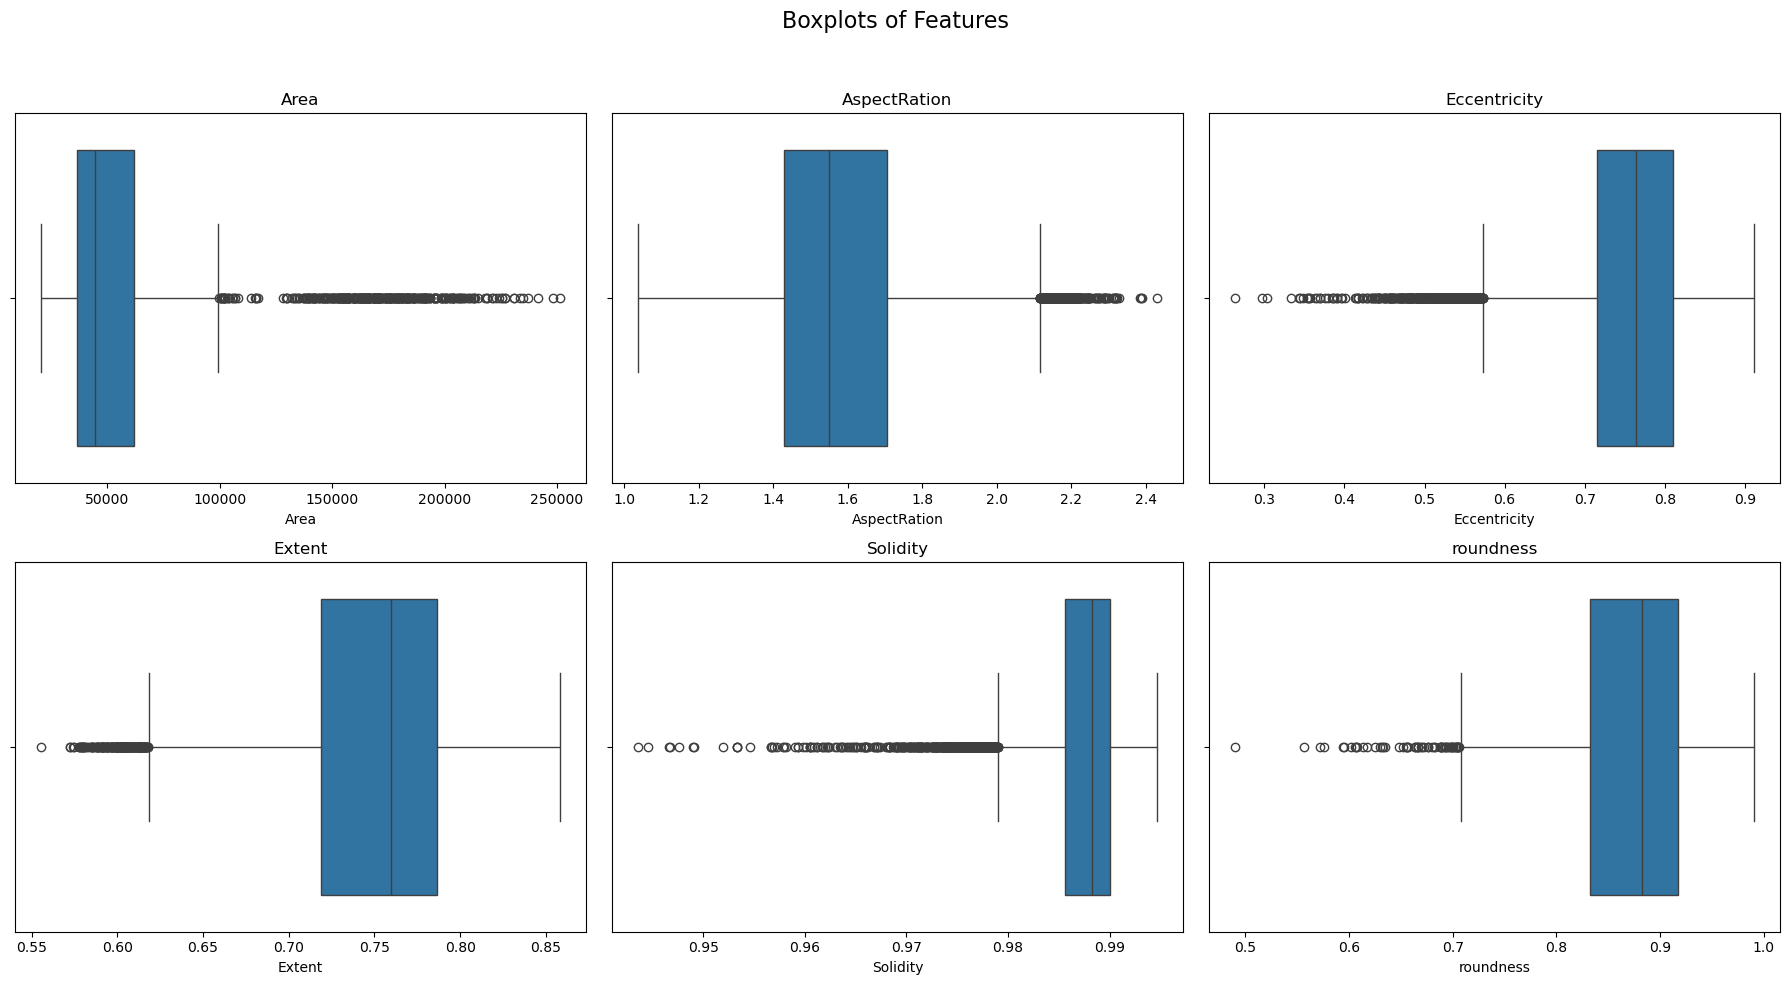

In [23]:
visualize_boxplots(main_df)

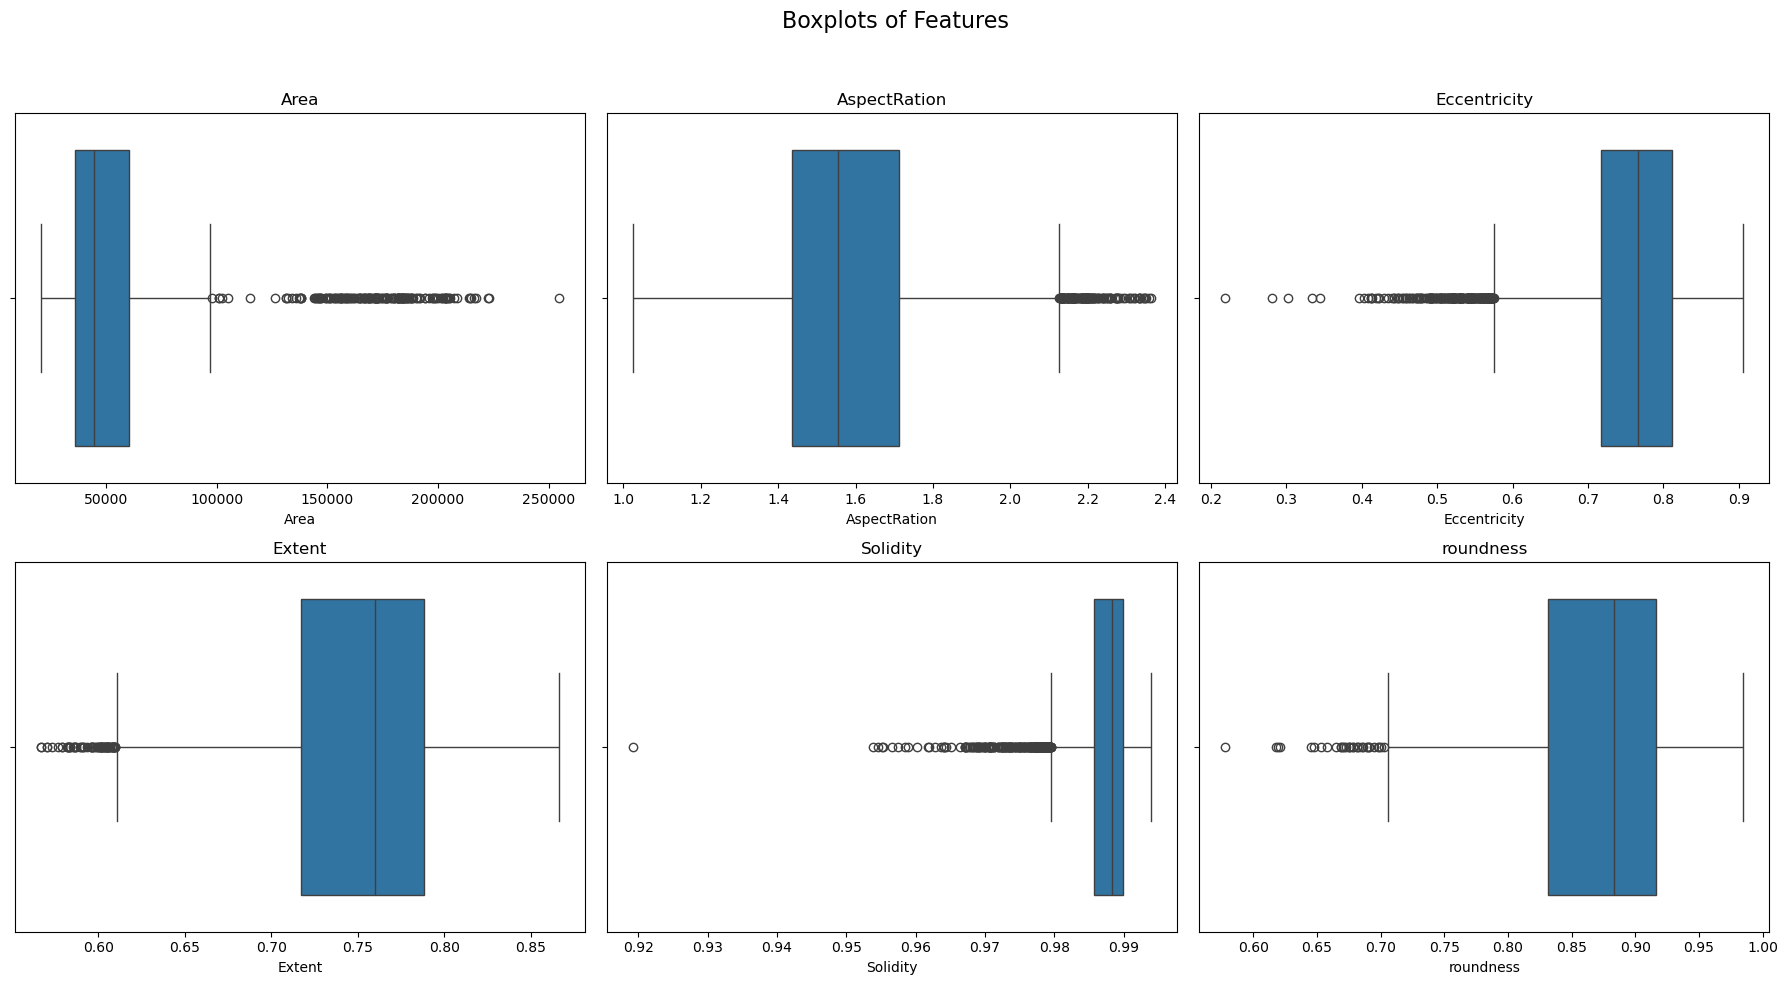

In [24]:
visualize_boxplots(additional_df)

- # Step 4: Initial Data Observations


- **Incomplete Data:**
  - Both datasets have missing values in several columns. For example:
    - In the main dataset, 'Area', 'Solidity', and other columns have varying numbers of null values.
    - In the additional dataset, the 'Color' column is entirely null, suggesting potential irrelevance or missing data.
  
- **Outliers and Inconsistencies:**
  - The datasets likely have outliers, as seen from some high values in fields like 'Area' and 'Perimeter'.
  - Inconsistencies may arise from mixed measurement scales or calculation errors in metrics like 'AspectRatio' and 'Eccentricity'.
  

---

# Part 2: Data Integration
- # Step 1: Secondary Dataset Integration

- We already dropped the Color column in the additional dataset before.

In [30]:
additional_df = additional_df.rename(columns={
    'Length': 'MajorAxisLength',
    'Width': 'MinorAxisLength'
})
aligned_additional_df = additional_df[main_df.columns]
integrated_df = pd.concat([main_df, aligned_additional_df], axis=0, ignore_index=True)
missing_values = integrated_df.isnull().sum()
integrated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664 entries, 0 to 13663
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13586 non-null  float64
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13562 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

- # Step 2: Post-Integration Check

In [32]:
# Check for missing values after integration
print("\nMissing Values After Integration:")
print(integrated_df.isnull().sum())


Missing Values After Integration:
Area                78
Perimeter           53
MajorAxisLength     53
MinorAxisLength     53
AspectRation        53
Eccentricity        53
ConvexArea          53
EquivDiameter       53
Extent              53
Solidity           102
roundness           53
Compactness         53
ShapeFactor1        53
ShapeFactor2        53
ShapeFactor3        53
ShapeFactor4        53
Class               53
dtype: int64


### Data Integration Summary
- Merged Dataset Shape: 13,664 rows, 17 columns.
- Post-Integration Missing Values: Most columns have 53 missing values, except 'Area' (78) and 'Solidity' (102).

---

# Part 3: Data Preprocessing

- # Step 1: Data Cleaning

In [37]:
preprocessed_df = integrated_df.copy()
for column in preprocessed_df.columns:
    if preprocessed_df[column].isnull().sum() > 0:
        if preprocessed_df[column].dtype == 'object':
            preprocessed_df[column] = preprocessed_df[column].fillna(preprocessed_df[column].mode()[0])
        else:
            preprocessed_df[column] = preprocessed_df[column].fillna(preprocessed_df[column].mean())

# Verify if missing values have been handled
print("\nMissing Values After Handling:")
print(preprocessed_df.isnull().sum())


Missing Values After Handling:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


- # Step 2: Scaling

- Min-Max Normalization scales features to a fixed range, typically [0, 1]. This method is suitable for ensuring all features contribute equally, especially for algorithms sensitive to feature scales, like k-Nearest Neighbors and neural networks. It preserves the shape of the original distribution and is useful when there are no extreme outliers. By bringing features to the same scale, Min-Max ensures faster model convergence and balanced influence across features.

In [40]:
scaler = MinMaxScaler()
numerical_columns = preprocessed_df.select_dtypes(include=['float64', 'int64']).columns
preprocessed_df[numerical_columns] = preprocessed_df[numerical_columns].apply(lambda x: x.fillna(0) if x.isna().all() else x)
preprocessed_df[numerical_columns] = scaler.fit_transform(preprocessed_df[numerical_columns])

In [41]:
# Check for duplicates
duplicates = preprocessed_df.duplicated().sum()
print(duplicates)

119


In [42]:
preprocessed_df.drop_duplicates(inplace=True)

- # Step 3: Preprocessing Summary

- **Data Integration**: Both datasets were successfully merged by aligning common columns. Some discrepancies, such as missing values and column naming differences, were resolved.
- **Data Cleaning**: Missing values were handled using median imputation for continuous features and mode imputation for categorical features ('Class').
- **Data Scaling**: Min-Max Scaling was applied to ensure all continuous features fell within the [0, 1] range.
- **Duplicate Removal**: 119 duplicate rows dropped.

In [45]:
integrated_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13586.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13562.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53050.987414,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987147,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29340.213328,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004655,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36325.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985676,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44651.500000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988285,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.500000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [46]:
preprocessed_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13545.000000,13545.000000,13545.000000,13545.000000,13545.000000,13545.000000,13545.000000,13545.000000,13545.000000,13545.000000,13545.000000,13545.000000,13545.000000,13545.000000,13545.000000,13545.000000
mean,0.139334,0.226111,0.245471,0.236466,0.395786,0.767359,0.136387,0.224907,0.625653,0.900288,0.766456,0.460784,0.493048,0.372484,0.414558,0.910578
std,0.125448,0.146997,0.154533,0.133404,0.174524,0.132654,0.123021,0.145305,0.157471,0.061458,0.118537,0.177284,0.147209,0.192038,0.174795,0.083513
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067789,0.122214,0.125164,0.158064,0.288732,0.716554,0.065921,0.131582,0.525652,0.881109,0.686108,0.353727,0.406012,0.191635,0.305036,0.884482
50%,0.103366,0.184277,0.203171,0.207229,0.373564,0.787102,0.100747,0.188676,0.658019,0.915118,0.786038,0.464137,0.503745,0.366436,0.411187,0.935835
75%,0.174696,0.309696,0.347091,0.280513,0.483175,0.853069,0.171768,0.289871,0.744764,0.938160,0.852992,0.559168,0.585442,0.518719,0.506666,0.964623
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
integrated_df.isnull().sum()

Area                78
Perimeter           53
MajorAxisLength     53
MinorAxisLength     53
AspectRation        53
Eccentricity        53
ConvexArea          53
EquivDiameter       53
Extent              53
Solidity           102
roundness           53
Compactness         53
ShapeFactor1        53
ShapeFactor2        53
ShapeFactor3        53
ShapeFactor4        53
Class               53
dtype: int64

In [48]:
preprocessed_df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

# Part 4: Data Visualization and Analysis
- # Step 1: Feature Distributions Before and After Preprocessing

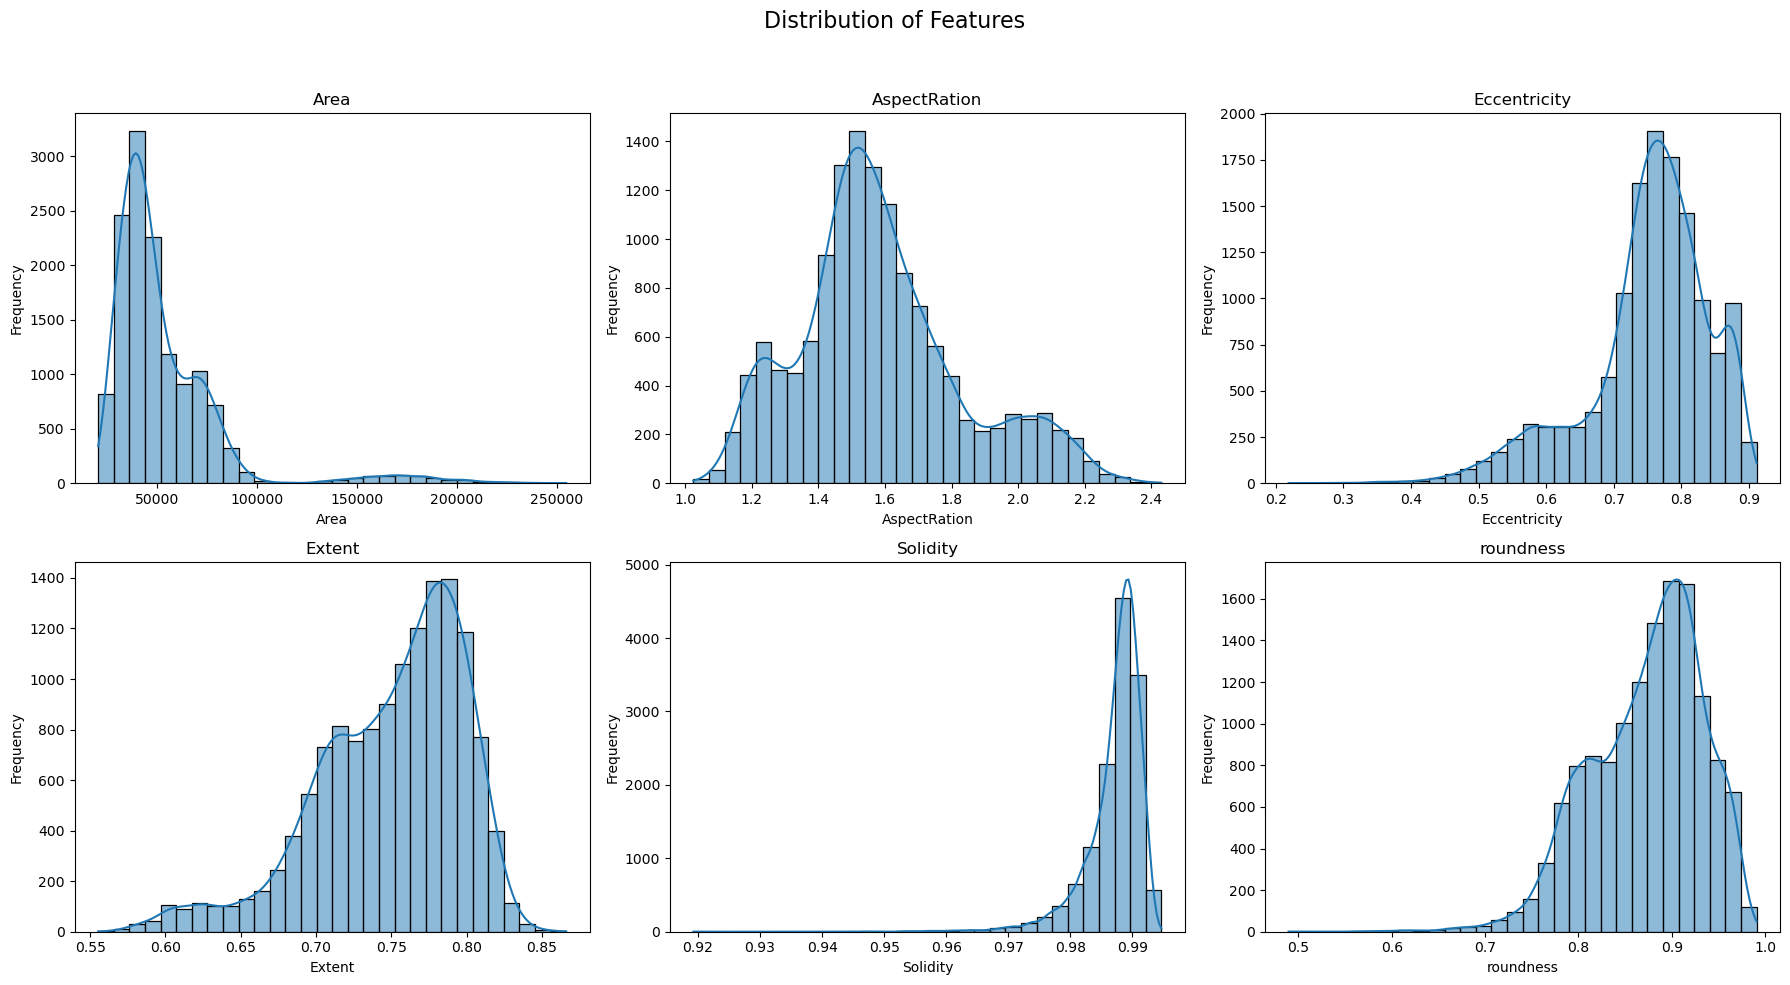

In [50]:
visualize_features(integrated_df)

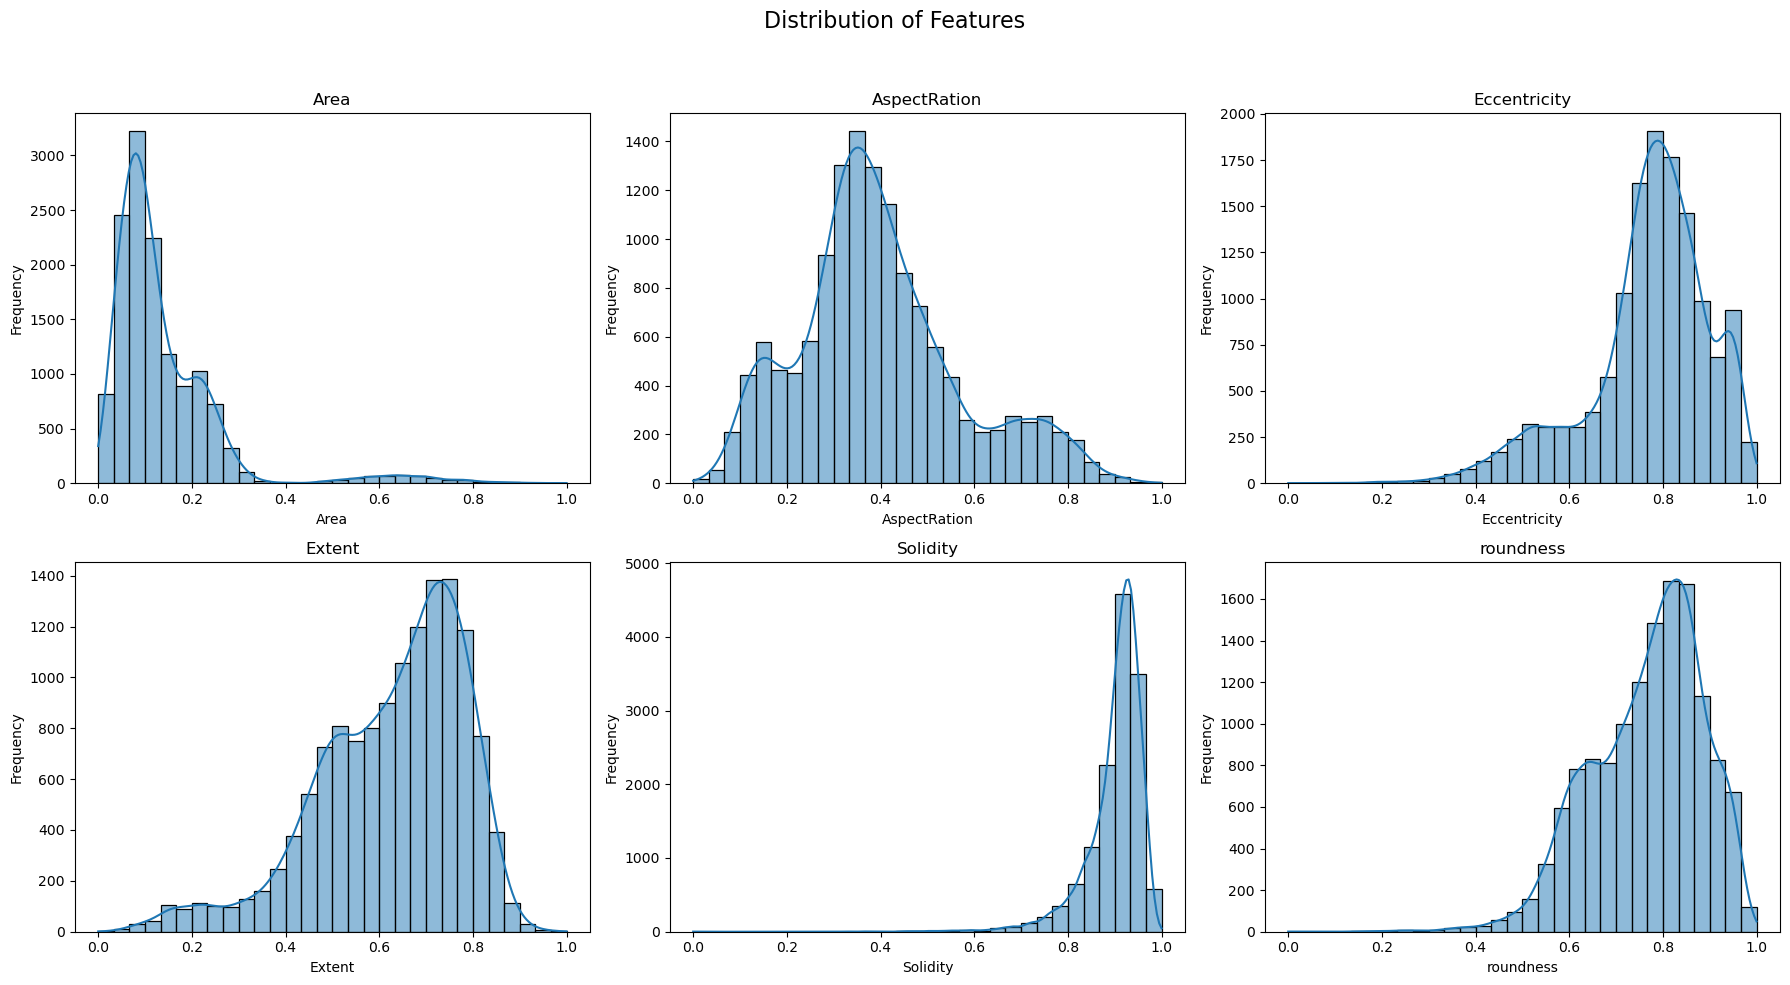

In [51]:
visualize_features(preprocessed_df)

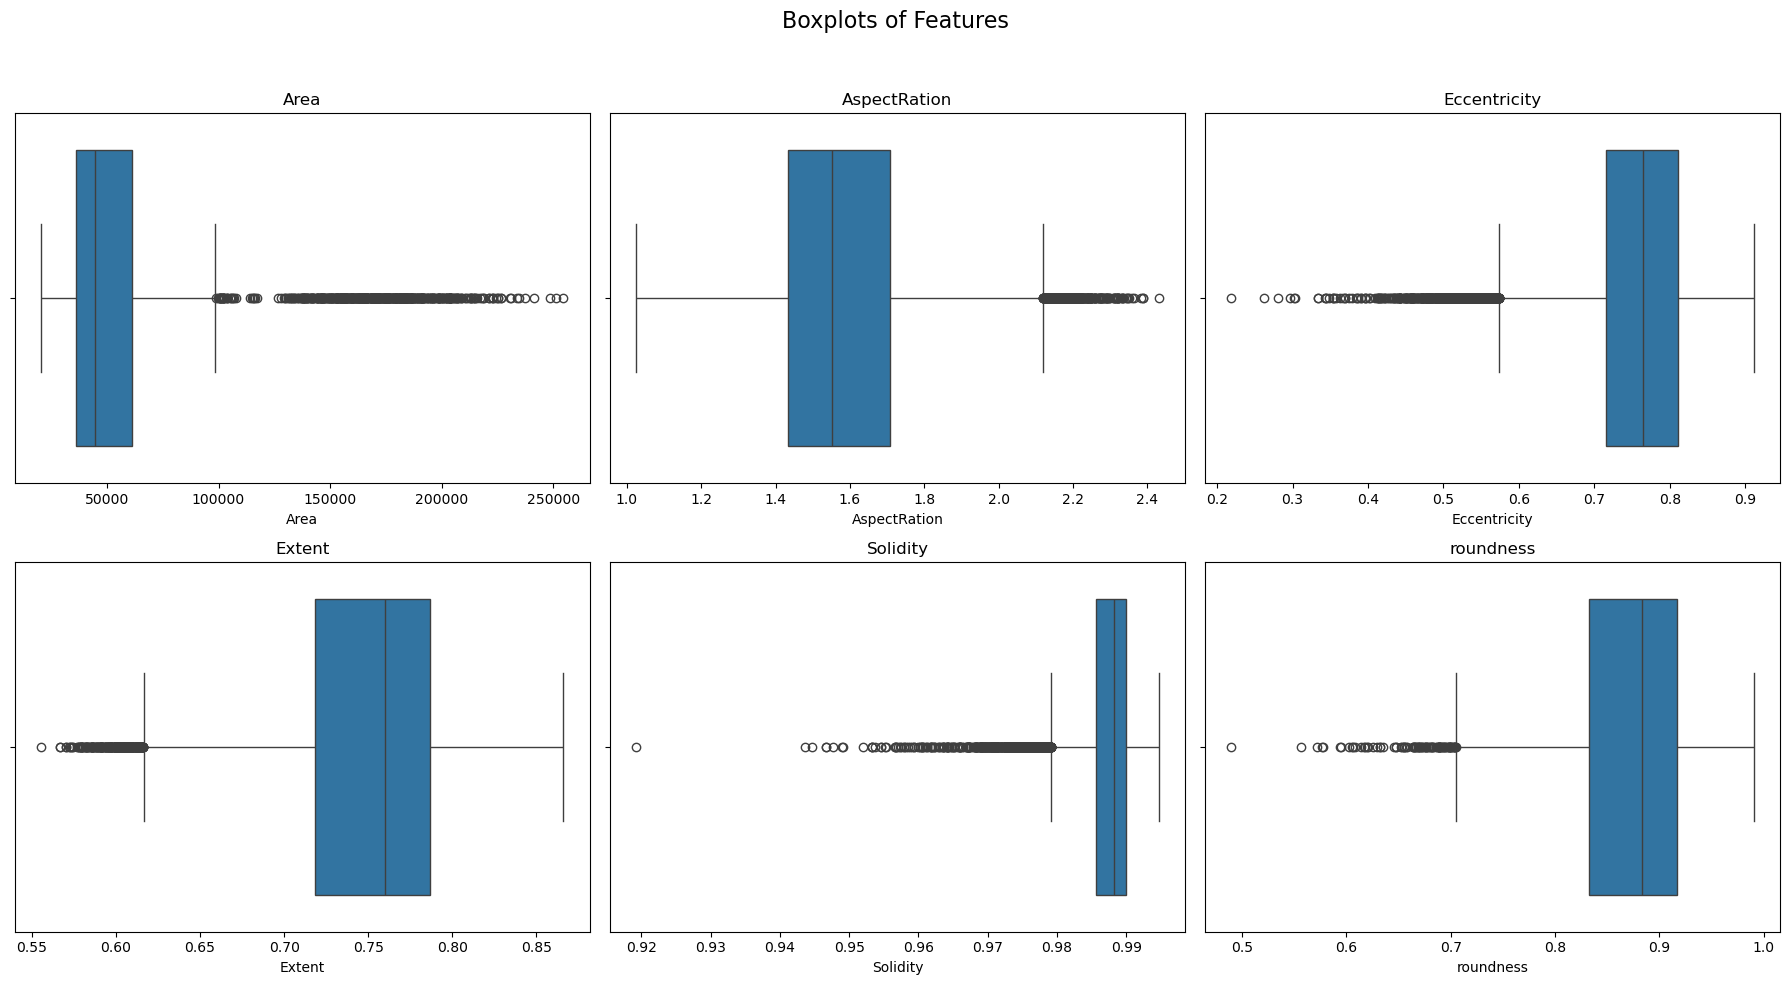

In [52]:
visualize_boxplots(integrated_df)

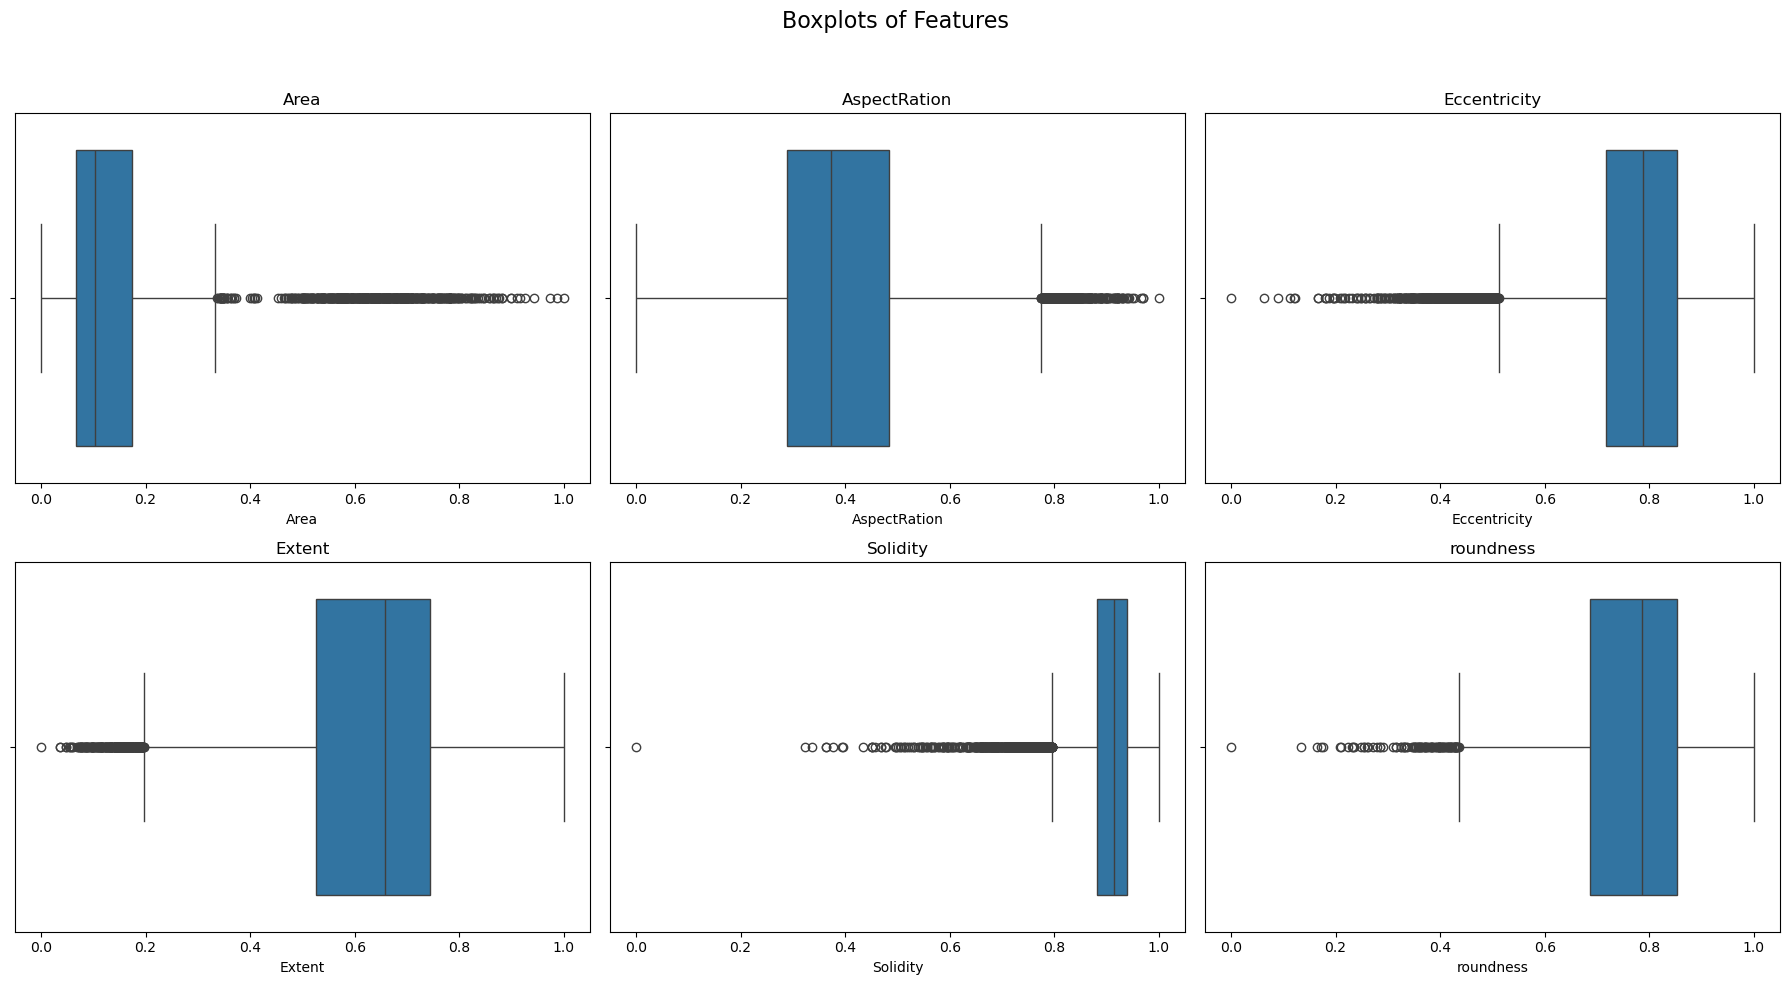

In [53]:
visualize_boxplots(preprocessed_df)

1. **General Distribution**
- Histograms: For both datasets, each feature shows a distribution that varies in spread and shape.

    - Area: Appears to be right-skewed with a heavy tail, suggesting that a majority of values are clustered towards the lower end, with a few large values.
    - Aspect Ratio, Eccentricity, Solidity, and Roundness: These features tend to show unimodal distributions, with the highest frequency concentrated within a specific range. This indicates that these feature values are somewhat consistent across the data.
    - Extent: The distribution of extent has a slight peak within a middle range, suggesting moderate variation in this feature across the dataset.
- Boxplots: The boxplots reflect these distributions and provide insight into outliers.

    - Area: Shows a significant number of outliers on the high end, matching the heavy tail seen in the histogram.
    - Other Features: Most of these features show a more compact range in the boxplots with a few outliers, especially in Aspect Ratio, Eccentricity, Extent, Solidity, and Roundness.
2. **Effects of Preprocessing (Scaling)**
- Range Adjustment: In the preprocessed dataset, all features appear to have been scaled to a range between 0 and 1. This transformation is typical of normalization or Min-Max scaling, which adjusts each feature to fit within a common scale, especially useful for machine learning algorithms that are sensitive to the scale of data.
- Distribution Shape: Although the range has changed, the general shape of each feature’s distribution remains the same in the preprocessed dataset as in the integrated dataset.
- Outliers: Scaling has normalized the extreme values across features.

- # Step 2: Correlation Analysis

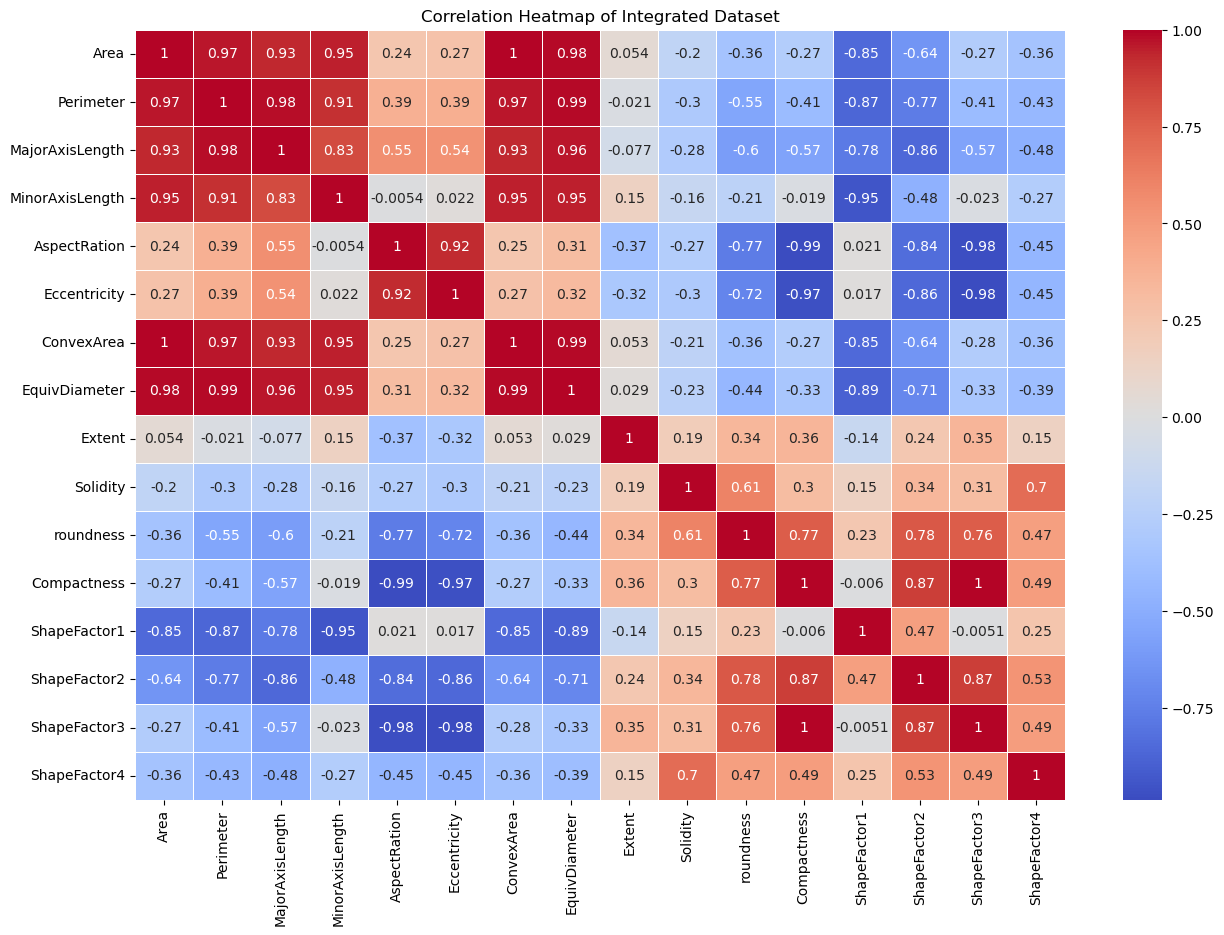

In [56]:
df_numeric = preprocessed_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15, 10))
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Integrated Dataset')
plt.show()

### Key Observations

1. **Strong Positive Correlations**:
   - Several variables exhibit strong positive correlations:
     - **Area**, **Perimeter**, **MajorAxisLength**, **MinorAxisLength**, **ConvexArea**, and **EquivDiameter** are all highly correlated with each other (correlations close to 0.9 to 1).
     - This suggests that these features likely measure similar properties of the dataset, possibly related to size or scale.

2. **Strong Negative Correlations**:
   - **Compactness** shows a strong negative correlation with **ShapeFactor1**, **ShapeFactor2**, **ShapeFactor3**, and **ShapeFactor4**.
   - This implies that as compactness increases, these shape factors tend to decrease, indicating an inverse relationship.

3. **Weak Correlations**:
   - **Extent**, **Eccentricity**, and **AspectRatio** tend to have weaker correlations with most of the other features, implying that they measure distinct characteristics.


### General Interpretation
- This heatmap is useful for understanding relationships between variables, which can help in feature selection, data preprocessing, and understanding potential multicollinearity in modeling.
- Highly correlated variables may not add much additional information and could be candidates for removal or transformation to avoid redundancy.
- Features with strong negative correlations can highlight opposing trends in the data.


- # Step 3: Principal Component Analysis (PCA)

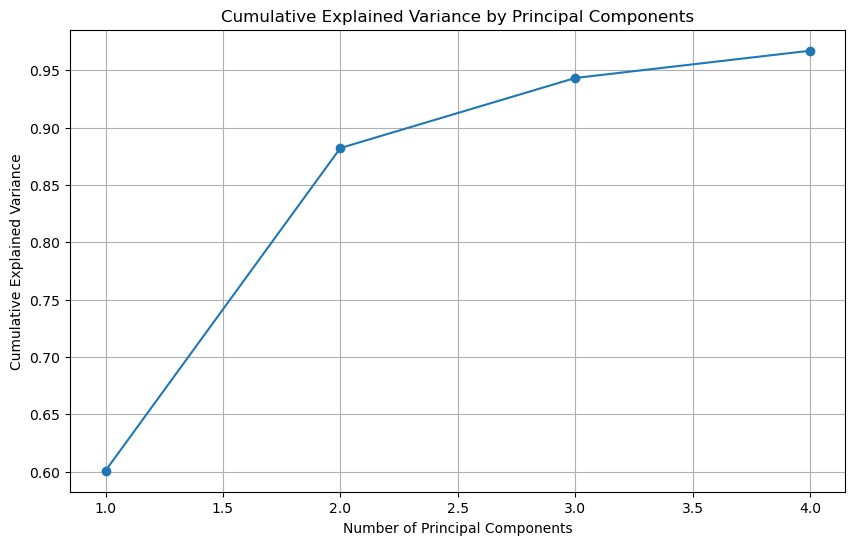

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Retain 95% of the variance
pca_components = pca.fit_transform(preprocessed_df[numerical_columns])
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


This plot illustrates the **cumulative explained variance** from a **Principal Component Analysis (PCA)** applied to the dataset, showing how much of the total variance is captured by each principal component.

### Key Points

1. **Interpretation**:
   - **First Component**: Captures about 60% of the variance.
   - **First 2 Components Combined**: Capture over 90% of the total variance, indicating that a significant portion of the data variability is represented by just two components.
   - **First 3 Components**: Capture close to 95% of the variance.
   - **First 4 Components**: Capture slightly above 95%, suggesting diminishing returns after the third component.

2. **Optimal Number of Components**:
   - Since over 90% of the variance is explained by the first two components, they may be sufficient to effectively represent the data with minimal information loss.
   - Including a third component would marginally increase the explained variance, but beyond that, the gain is minimal.

### General Conclusion
The plot suggests that **dimensionality reduction** using PCA can reduce the dataset from its original dimensions to **two or three components** while retaining most of the data’s variance. This helps simplify data visualization and modeling while maintaining interpretability and efficiency.


- # Step 4: Data Insights

1. **Distribution of Features**:
   - **Area**: This feature exhibits a right-skewed distribution, indicating the presence of larger values that are less frequent. The data points extend towards the right, suggesting some outliers with significantly larger areas.
   - **AspectRatio** and **Eccentricity**: These appear to have a more centralized distribution, likely close to normal with slight skewness, which may represent varying shapes or orientations.
   - **Extent, Solidity, and Roundness**: These features show tightly grouped values with high frequencies around certain values, implying that most data points exhibit similar shape characteristics, possibly indicating homogeneity in certain structural properties across observations.

2. **Boxplot Analysis**:
   - The boxplots highlight the presence of **outliers** in features like **Area**, **Solidity**, and **Eccentricity**. This suggests that while most data points are clustered within a typical range, there are some observations with extreme values. These outliers might represent unique instances or errors in data that may need further investigation, especially before applying machine learning models.

3. **Correlation Heatmap**:
   - **Strong Positive Correlations**: Features like **Area**, **Perimeter**, **ConvexArea**, and **Equivalent Diameter** are highly correlated. This suggests that these features are likely interdependent, capturing similar aspects of the data (e.g., object size or shape).
   - **Negative Correlations**: Features like **AspectRatio**, **Roundness**, and **Compactness** have negative correlations with others. For instance, as **AspectRatio** increases, **Roundness** tends to decrease. These relationships could be essential for distinguishing certain shapes or structures, potentially beneficial in classification tasks.
   - This insight on correlation can be valuable for dimensionality reduction techniques, as highly correlated features may provide redundant information.

4. **Principal Component Analysis (PCA)**:
   - The cumulative explained variance plot shows that the first few components explain most of the variance in the dataset, with nearly 95% explained by the first four components. This suggests that the dataset could potentially be reduced to a few dimensions without losing substantial information. This reduction could improve computational efficiency and may aid in creating more interpretable models.


### Challenges Faced and How They Were Addressed

- 1.**Missing Values in Datasets:** Both the main and additional datasets contained missing values. To handle these, we filled numerical features with their mean values and categorical features with the mode. This ensured data completeness without introducing bias.

- 2.**Non-Matching Column Names:** The main and additional datasets had similar columns with different names (e.g., 'Length' vs 'MajorAxisLength'). This was resolved by renaming columns in the additional dataset to match those in the main dataset, allowing a seamless integration.
- 3.**Handling All-NaN Columns:** Some columns had all NaN values like 'Color', this was resolved by dropping it because it did not provide any information.